In [4]:
!pip install folium

In [1]:
import pandas as pd
import numpy as np
import csv
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import urllib.request
import json
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
print('Libraries imported.')

Libraries imported.


### *Instructions for the assignment*
**Review criteria**
 
This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

For this week, you will required to submit the following:

1. A description of the problem and a discussion of the background. (15 marks)
2. A description of the data and how it will be used to solve the problem. (15 marks)

# European Union (EU): Diversity and Business Opportunities

## Introduction

The European Union (EU) is a unique economic and political entity consisted of 27 EU countries that cover much of the european continent (**Source:** EU's official web page, https://europa.eu/european-union/about-eu/eu-in-brief_en). The predecessor, European Economic Community (EEC), was created in 1958 after the Second World War, and initially increasing economic cooperation between six countries: Belgium, Germany, France, Italy, Luxembourg and the Netherlands. Since then 22 more countries joined the EU. Initially, the EEC was begun  as a purely economic union and it has been evolved into an organization expanding policy areas, from climate, environment and health to external relations and security, justice and migration. In 1993, the name EEC was changed to EU. The EU consists 27 countries now after the exiting of Great Bretain in January, 2020.The Schengen Area, an area without internal borders, an area within which citizens, many non-EU nationals, business people and tourists can freely travel without being subjected to border checks. 

## Aim 
Because EU countries, under the Schengen Area, allows free circulation of EU citizens, and non-citizens within the EU, there is a diverse population that belongs to different ethnic groups, religions, and cultures. About  400 million of the population within EU belong to 12 major nationalities, and about 60 million belong to minor ethnic groups (based on nationality). Current trends in migration and working opportunities indicate that the European populations will be becoming more and more ethnically and culturally diverse on the basis of current treands. 
Therefore 

The aim of this project is two fold. 
**Aim 1:** To analyze some available data in these countries to evaluate simmilarities and/or dissimilarities between the cities within EU contries. A collection of 93 cities are used in the analysis. 
**Aim 2:** To evaluate venue data between select cities (based on higher population) to determine a suitable city to open a restaurant and which type of cuisine based on city's cultural diversity depending on current cuisine trends in these countries. 

**Aim** 1 will help understand the diversity within european countries while the **Aim2** will help making informed decisions in one of the business opportunies: Cuisine. This project can be useful for business owners and entrepreneurs who are looking to invest in the restaurant industry within the European Union. The main objective of this project is to analyze appropriate data and to provide recommendations for the stakeholders.

## Data 

Data that is required for this project have been obtained from ifferent sources.

A1. European demographic data (**Source:** https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Ethnic_composition) was scraped from Wikipedia to obtain some population data to investigate about population in european countries. Analysis of demographic data will help understand the diversity within EU countries.

A2. The population within city limits has been obained from Wikipedia (https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits)    

B. Forbes Best Countries for Business (**Source:** https://www.forbes.com/best-countries-for-business/list/#tab:overall) indicates some of the European countries are among the best countries for business: Sweden (#2), Netharlands (#4), Denmark (#7), and Switzerland (#10). This will also be helpful in determining a city to open a restaurant.

Initial observation of EU population data is that  Germany (18.5%), France (15%), Italy (13.6%, Spain (10.4%), and Poland (8.5%) are among the highest populated countries; however, their population density is not the hghest, meaning that there are some contries with less area having a higher population. For example, Malta has the highest population desity among EU contries, and Malta has the highest % net immigration of 35%. EU immigration data also shows that there are some countries with higher net immigration whereas some countries has a negative trend. Further investigation of these data may help understanding the uniqueness or diversity in some cities and/ or countries.

Eventually, these analyses will help better inform investors and stakeholders for decision making with respect to business opportunities as well as the trends in these countries.

## Methods 
To achieve these goals above, the following strategy was used:
### A. Data Collection and Wrangling
1. EU city data has been collected from Wikipedia
   - Link: https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country
   - Webscrape tables (country, city data, which include additional demographic data.) 
2. Data wrangling to create a clean Pandas dataframes for european countries and cities data.

### B. Geographical Coordinates and Venue Data
3. Use Geo Location data
   - The geographical coordinates for European cities has been obtained from the GeoPy library in python. This data    is used for plotting the map of European cities using the Folium library in python. The geocoder library in        python has been used to obtain latitude and longitude data for various neighborhoods in European cities.
4. Use Foursquare API to extract Venue data
   - Venue data will be used for comparing the 93 cities. 
   - dditional efforts will be made to evaluate other information available from Foursquare API such as residence etc.
   
### C. Cluster Analysis
5. Compare cities through K-means clustering.
   - Venue data will be used to compare the 93 cities
   - Compare select 2-3 cities (dissimilar and/ or similar) that have been clustered together (for similarity) or        differently (dissimilarity). 
   - Efforts will be made to compare cities within the same country if they will be found to be in different  
     clusters 
6. Identify a city and which type of restaurant that can be opened in the city based on venue data clustered in #5.

### D. Other Analysis
Statistical analysis methods such as multivariate data analysis will be explored by using additional EU data. 

## Results

### Note: Results will be added at Week 5 for the full report. However, most of the results are available in the Jupiter Notebook at Github (and the link).

## Demographics of the European Union

### A. Population

#### Source: https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country

In [90]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country'
df = pd.read_html(url)[1]
df.head()

,Member State,Population,Percentof total EU-27 pop.,Total area km2,Percentof total EU-27 area,Pop. densityPeople/km2
0,European Union,445834883,100.00%,4079962,100.00%,105.3
1,Austria,8772865,1.97%,83858,1.98%,104.6
2,Belgium,11351727,2.55%,30510,0.72%,372.1
3,Bulgaria,7101859,1.59%,110912,2.62%,64.0
4,Croatia,4154213,0.93%,56594,1.34%,73.4


The population in the European Union countries exceeds 445 million. The total area is over 4 million aquare kilometers. The average population density is about 105 people per square kilometer, which varies between member countries.   

Let's remove the first row (EU overall data), and rename some headings.

In [91]:
df = df.drop([0])
df.reset_index(drop=True, inplace=True)
df['Percentof total EU-27 pop.'] = df['Percentof total EU-27 pop.'].map(lambda x: str(x).rstrip('%'))
df['Percentof total EU-27 area'] = df['Percentof total EU-27 area'].map(lambda x: str(x).rstrip('%'))
df.rename(columns={'Member State': 'Country', 'Percentof total EU-27 pop.': '% Population', 'Total area km2': 'Area (km^2)', 'Percentof total EU-27 area': '% Area'}, inplace=True)
df.head()

,Country,Population,% Population,Area (km^2),% Area,Pop. densityPeople/km2
0,Austria,8772865,1.97,83858,1.98,104.6
1,Belgium,11351727,2.55,30510,0.72,372.1
2,Bulgaria,7101859,1.59,110912,2.62,64.0
3,Croatia,4154213,0.93,56594,1.34,73.4
4,Cyprus,854802,0.19,9250,0.22,92.4


In [92]:
df.shape

(27, 6)

The dataframe has 27 rows representing the 27 member countries. 

Plot populations of contries. 

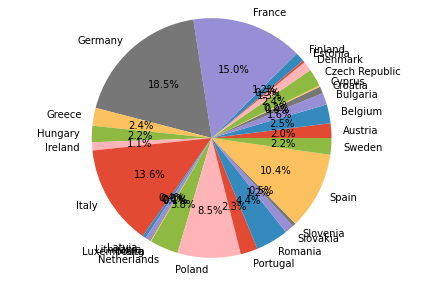

In [93]:
plt.pie(
    df['Population'],
    # with the labels being officer names
    labels=df['Country'],
    # with no shadows
    shadow=False,
    # with colors
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

plt.tight_layout()
plt.show()

As seen above, there is a higher population in Germany (18.5%), France (15%), Italy (13.6%, Spain (10.4%), and Poland (8.5%).

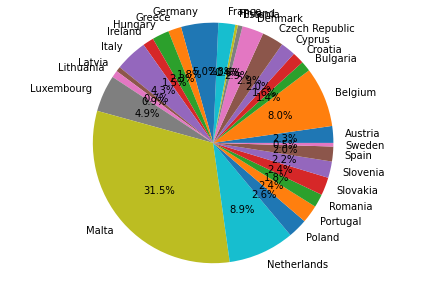

In [6]:
plt.pie(
    df['Pop. densityPeople/km2'],
    # with the labels being officer names
    labels=df['Country'],
    # with no shadows
    shadow=False,
    # with colors
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

plt.tight_layout()
plt.show()

However,the population density is very different when compare to population. Malta (31.5%),Netherlands (8.9%), Belgium (8%) has highest population dencities.  

Let's have a look at some cities in Europe. Here, 93 cities are listed.   

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits'
df1 = pd.read_html(url)[1]
df1.head()

,City,Member State,Officialpopulation,Date of census,Reference,Photography
0,Berlin,Germany,3769495,31 December 2019,[1],NaN
1,Madrid,Spain,3348536,1 February 2020,[2],NaN
2,Rome,Italy,2856133,31 December 2018,[3],NaN
3,Bucharest,Romania,2151665,1 January 2020,[4],NaN
4,Paris,France,2140526,1 January 2019,[5][6],NaN


In [8]:
df1.shape

(93, 6)

In [9]:
df1.drop(['Date of census', 'Reference', 'Photography'], axis=1, inplace=True)
df1.rename(columns={'Member State': 'Country', 'Officialpopulation': 'Population'}, inplace=True)
df1.head()

,City,Country,Population
0,Berlin,Germany,3769495
1,Madrid,Spain,3348536
2,Rome,Italy,2856133
3,Bucharest,Romania,2151665
4,Paris,France,2140526


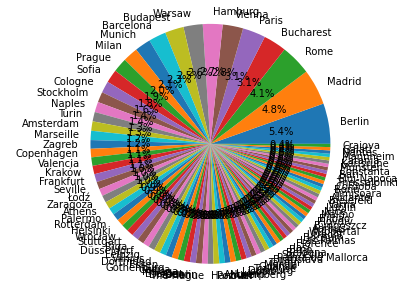

In [10]:
plt.pie(
    df1['Population'],
    # with the labels being officer names
    labels=df1['City'],
    # with no shadows
    shadow=False,
    # with colors
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

plt.tight_layout()
plt.show()

Geographical locations have been extracted by using GeoPy. Plot these cities in world map to see geographical location

In [11]:
geolocator = Nominatim(user_agent="Geo_Explorer")
list_lat = [] 
list_long = []

for index, row in df1.iterrows(): # iterate over rows in dataframe

    City = row['City']
    Country = row['Country']
    Search = City+","+Country
    location = geolocator.geocode(Search)
    latitude = location.latitude
    longitude = location.longitude

    list_lat.append(latitude)
    list_long.append(longitude)

# create new columns from lists    

df1['latitude'] = list_lat   

df1['longitude'] = list_long
df1.head()

,City,Country,Population,latitude,longitude
0,Berlin,Germany,3769495,52.501522,13.402550
1,Madrid,Spain,3348536,40.416705,-3.703582
2,Rome,Italy,2856133,41.893320,12.482932
3,Bucharest,Romania,2151665,44.436141,26.102720
4,Paris,France,2140526,48.856697,2.351462


In [95]:
map_europe = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, city in zip(df1['latitude'], df1['longitude'], df1['City']):
    label = '{}, {}'.format(df, City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_europe)  
    
map_europe

### B. Population Shifts within EU

In [48]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_the_European_Union#Population_by_country'
df_a = pd.read_html(url)[3]
df_a.head()

,Country,Population(2019)[3],Population growth(‰) (2018)[8],Natural change(‰) (2018)[9],Net migration(‰) (2018)[10],Total fertility rate(2018)[11]
0,European Union,446824564,1.6,-1.0,2.6,1.55
1,Germany,83019214,2.7,-2.0,4.8,1.57
2,France,67028048,1.4,2.2,-0.8,1.88
3,Italy,60359546,-2.1,-3.2,1.1,1.29
4,Spain,46934632,6.0,-1.2,7.1,1.26


In [49]:
df_a.tail()

,Country,Population(2019)[3],Population growth(‰) (2018)[8],Natural change(‰) (2018)[9],Net migration(‰) (2018)[10],Total fertility rate(2018)[11]
24,Estonia,1324820,4.3,-1.0,5.3,1.67
25,Cyprus,875898,13.4,4.1,9.3,1.32
26,Luxembourg,613894,19.6,3.2,16.3,1.38
27,Malta,493559,36.8,1.6,35.3,1.23
28,Country,Population,Population growth,Natural change,Net migration,Total fertility rate


In [50]:
df_a = df_a.drop([0, 28])
df_a.head()

,Country,Population(2019)[3],Population growth(‰) (2018)[8],Natural change(‰) (2018)[9],Net migration(‰) (2018)[10],Total fertility rate(2018)[11]
1,Germany,83019214,2.7,-2.0,4.8,1.57
2,France,67028048,1.4,2.2,-0.8,1.88
3,Italy,60359546,-2.1,-3.2,1.1,1.29
4,Spain,46934632,6.0,-1.2,7.1,1.26
5,Poland,37972812,-0.1,-0.7,0.6,1.46


In [51]:
df_a.shape

(27, 6)

In [52]:
df_a.drop(['Population(2019)[3]', 'Total fertility rate(2018)[11]'], axis=1, inplace=True)
df_a

,Country,Population growth(‰) (2018)[8],Natural change(‰) (2018)[9],Net migration(‰) (2018)[10]
1,Germany,2.7,-2.0,4.8
2,France,1.4,2.2,-0.8
3,Italy,-2.1,-3.2,1.1
4,Spain,6.0,-1.2,7.1
5,Poland,-0.1,-0.7,0.6
6,Romania,-6.0,-3.1,-2.8
7,Netherlands,5.9,0.9,5.0
8,Belgium,5.0,0.7,4.3
9,Greece,-1.5,-3.2,1.6
10,Czech Republic,3.7,0.1,3.6


In [53]:
df_a.rename(columns={'Population growth(‰) (2018)[8]': 'Population Growth (%)', 'Natural change(‰) (2018)[9]': 'Natural change(‰)', 'Net migration(‰) (2018)[10]': 'Net Migration (%)'})

,Country,Population Growth (%),Natural change(‰),Net Migration (%)
1,Germany,2.7,-2.0,4.8
2,France,1.4,2.2,-0.8
3,Italy,-2.1,-3.2,1.1
4,Spain,6.0,-1.2,7.1
5,Poland,-0.1,-0.7,0.6
6,Romania,-6.0,-3.1,-2.8
7,Netherlands,5.9,0.9,5.0
8,Belgium,5.0,0.7,4.3
9,Greece,-1.5,-3.2,1.6
10,Czech Republic,3.7,0.1,3.6


In [54]:
mpl.style.use('ggplot')

### C. Analyzing Veue Data using Geographical Coordinates

In [55]:
CLIENT_ID = 'QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN' # your Foursquare ID
CLIENT_SECRET = 'OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN
CLIENT_SECRET:OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232


### *df1 = Dataframe for city and country data with Geographical Coordinates*

In [56]:
df1.loc[0, 'City']

'Berlin'

In [57]:
latitude = df1.loc[0, 'latitude'] # neighborhood latitude value
longitude = df1.loc[0, 'longitude'] # neighborhood longitude value

name = df1.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Berlin are 52.5015217, 13.4025498.


In [58]:
#search_query = 'Restaurant'
#radius = 1000
#print(search_query + ' .... OK!')

**Generating the url for Foursquare search**

In [59]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QQ2MP5XNO5CQTQWBD0ROEEESVSULV3GBLIVARRI5SWG2OMYN&client_secret=OZJN2KWI3DBPLCB1KQERQFOAMP5A4VG2YI5UQDLJTMZH4232&v=20180605&ll=52.5015217,13.4025498&radius=1000&limit=200'

In [60]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fba539aa614367fd9f22dfe'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Moritzplatz',
  'headerFullLocation': 'Moritzplatz, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 109,
  'suggestedBounds': {'ne': {'lat': 52.51052170900001,
    'lng': 13.417306838579256},
   'sw': {'lat': 52.492521690999986, 'lng': 13.387792761420743}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5138d0c6e4b03cf69cbc4441',
       'name': 'St. Agnes',
       'location': {'address': 'Alexandrinenstr. 118-121',
        'lat': 52.500645241285184,
        'lng': 13.40104614278766,
        'labeledLatLngs': [{'label': 'display',
          'lat

## Note: Further analysis and reporting will be the work for Week 5

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    city_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    city_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(city_venues)

In [62]:
city_venues = getNearbyVenues(names=df1['City'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

Berlin
Madrid
Rome
Bucharest
Paris
Vienna
Hamburg
Warsaw
Budapest
Barcelona
Munich
Milan
Prague
Sofia
Cologne
Stockholm
Naples
Turin
Amsterdam
Marseille
Zagreb
Copenhagen
Valencia
Kraków
Frankfurt
Seville
Łódź
Zaragoza
Athens
Palermo
Rotterdam
Helsinki
Wrocław
Stuttgart
Riga
Düsseldorf
Leipzig
Vilnius
Dortmund
Essen
Gothenburg
Genoa
Málaga
Bremen
Dresden
Dublin
The Hague
Hanover
Poznań
Antwerp
Nuremberg
Lyon
Lisbon
Duisburg
Toulouse
Gdańsk
Murcia
Tallinn
Bratislava
Palma de Mallorca
Szczecin
Bologna
Brno
Iași
Florence
Las Palmas
Bochum
Utrecht
Wuppertal
Aarhus
Bydgoszcz
Plovdiv
Bilbao
Malmö
Nice
Lublin
Varna
Bielefeld
Alicante
Timișoara
Bonn
Córdoba
Thessaloniki
Cluj-Napoca
Bari
Constanța
Münster
Karlsruhe
Catania
Mannheim
Nantes
Galați
Craiova


In [63]:
city_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berlin,52.501522,13.40255,St. Agnes,52.500645,13.401046,Art Gallery
1,Berlin,52.501522,13.40255,König Gallery,52.500796,13.401083,Art Gallery
2,Berlin,52.501522,13.40255,Berlinische Galerie,52.503494,13.398403,Art Museum
3,Berlin,52.501522,13.40255,MAHLZEIT Kreuzberg,52.498893,13.400009,Bistro
4,Berlin,52.501522,13.40255,Flying Steps Academy,52.503018,13.407392,Dance Studio


In [65]:
city_venues['City'].value_counts()

Essen        100
Vienna       100
Iași         100
Hamburg      100
Dublin       100
            ... 
Galați        42
Aarhus        41
Budapest      25
Wuppertal     16
Gdańsk        15
Name: City, Length: 93, dtype: int64

In [66]:
city_venues.shape

(8621, 7)

In [67]:
city_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Aarhus,41,41,41,41,41,41
Alicante,100,100,100,100,100,100
Amsterdam,100,100,100,100,100,100
Antwerp,100,100,100,100,100,100
Athens,100,100,100,100,100,100
...,...,...,...,...,...,...
Wrocław,100,100,100,100,100,100
Wuppertal,16,16,16,16,16,16
Zagreb,100,100,100,100,100,100


In [68]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

There are 387 uniques categories.


In [69]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]
city_onehot.head()

,City,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo Exhibit
0,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
city_onehot.shape

(8621, 388)

In [71]:
city_grouped = city_onehot.groupby('City').mean().reset_index()
city_grouped

,City,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo Exhibit
0,Aarhus,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.02439,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0
1,Alicante,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,...,0.01,0.00000,0.00,0.00,0.01,0.00,0.0,0.00,0.0,0.0
2,Amsterdam,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.00,0.00,0.00,0.0,0.01,0.0,0.0
3,Antwerp,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.01000,0.01,0.00,0.00,0.00,0.0,0.01,0.0,0.0
4,Athens,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.01,0.01,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Wrocław,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.00,0.00,0.01,0.0,0.00,0.0,0.0
89,Wuppertal,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0
90,Zagreb,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.00,0.04,0.00,0.0,0.00,0.0,0.0
91,Zaragoza,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00000,0.00,0.00,0.01,0.00,0.0,0.00,0.0,0.0


In [72]:
city_grouped.shape

(93, 388)

In [73]:
num_top_venues = 5

for city in city_grouped['City']:
    print("----"+city+"----")
    temp = city_grouped[city_grouped['City'] == City].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aarhus----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Alicante----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Amsterdam----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Antwerp----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Athens----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Barcelona----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place  0.05


----Bari----
         venue  freq
0        Hotel  0.12
1          Bar  0.12
2   Restaurant  0.08
3          Pub  0.08
4  Pizza Place 

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aarhus,Café,Hotel,Plaza,Coffee Shop,Park,Beer Bar,Pub,French Restaurant,Bakery,Outdoor Sculpture
1,Alicante,Restaurant,Spanish Restaurant,Tapas Restaurant,Ice Cream Shop,Café,Italian Restaurant,Pub,Burger Joint,Mediterranean Restaurant,Food & Drink Shop
2,Amsterdam,Hotel,Bar,Bookstore,Cocktail Bar,Café,French Restaurant,Coffee Shop,Sandwich Place,Breakfast Spot,Thai Restaurant
3,Antwerp,Coffee Shop,Cocktail Bar,Bar,Clothing Store,Plaza,Italian Restaurant,Bookstore,Sushi Restaurant,Belgian Restaurant,Bistro
4,Athens,Café,Bar,Dessert Shop,Coffee Shop,Cocktail Bar,Greek Restaurant,Hotel,Plaza,Theater,Falafel Restaurant


In [78]:
city_venues_sorted['City'].value_counts()

Barcelona    1
Lisbon       1
Szczecin     1
Duisburg     1
Florence     1
            ..
Lyon         1
Utrecht      1
Dresden      1
Murcia       1
Milan        1
Name: City, Length: 93, dtype: int64

In [79]:
# set number of clusters
kclusters = 5

city_grouped_clustering = city_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 0, 2, 1, 4, 0, 2, 1])

In [80]:
# add clustering labels
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = df1

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
city_merged = city_merged.join(city_venues_sorted.set_index('City'), on='City')
city_merged.head() # check the last columns!

,City,Country,Population,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berlin,Germany,3769495,52.501522,13.402550,0,Hotel,Café,Bistro,German Restaurant,Italian Restaurant,Korean Restaurant,Coffee Shop,Art Gallery,Nightclub,Dance Studio
1,Madrid,Spain,3348536,40.416705,-3.703582,1,Plaza,Hotel,Spanish Restaurant,Hostel,Café,Restaurant,Ice Cream Shop,Tapas Restaurant,Mediterranean Restaurant,Theater
2,Rome,Italy,2856133,41.893320,12.482932,4,Historic Site,Plaza,Ice Cream Shop,Italian Restaurant,Monument / Landmark,Church,Sandwich Place,Wine Bar,Fountain,Pizza Place
3,Bucharest,Romania,2151665,44.436141,26.102720,0,Coffee Shop,Hotel,Bookstore,Ice Cream Shop,Pizza Place,Dessert Shop,Gastropub,Restaurant,Gym / Fitness Center,Bakery
4,Paris,France,2140526,48.856697,2.351462,0,French Restaurant,Plaza,Ice Cream Shop,Coffee Shop,Art Gallery,Burger Joint,Hotel,Garden,Bookstore,Historic Site


In [81]:
city_merged['Cluster Labels'].value_counts()

0    42
2    29
1    12
4     9
3     1
Name: Cluster Labels, dtype: int64

In [94]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['latitude'], city_merged['longitude'], city_merged['City'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [83]:
city_merged.loc[city_merged['Cluster Labels'] == 0, city_merged.columns[[0, 1] + list(range(5, city_merged.shape[1]))]]

,City,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berlin,Germany,0,Hotel,Café,Bistro,German Restaurant,Italian Restaurant,Korean Restaurant,Coffee Shop,Art Gallery,Nightclub,Dance Studio
3,Bucharest,Romania,0,Coffee Shop,Hotel,Bookstore,Ice Cream Shop,Pizza Place,Dessert Shop,Gastropub,Restaurant,Gym / Fitness Center,Bakery
4,Paris,France,0,French Restaurant,Plaza,Ice Cream Shop,Coffee Shop,Art Gallery,Burger Joint,Hotel,Garden,Bookstore,Historic Site
5,Vienna,Austria,0,Café,Austrian Restaurant,Hotel,Plaza,Restaurant,Cocktail Bar,Ice Cream Shop,Italian Restaurant,Supermarket,Bar
6,Hamburg,Germany,0,Coffee Shop,Hotel,Vietnamese Restaurant,Café,Burger Joint,Theater,Steakhouse,Plaza,Clothing Store,German Restaurant
7,Warsaw,Poland,0,Coffee Shop,Hotel,Café,Hotel Bar,Pizza Place,American Restaurant,Bistro,Beer Bar,Bookstore,Cocktail Bar
8,Budapest,Hungary,0,Bus Stop,Park,Hungarian Restaurant,Brewery,Bistro,Deli / Bodega,Basketball Court,Historic Site,Supermarket,Track
10,Munich,Germany,0,Hotel,Café,Bavarian Restaurant,Plaza,Coffee Shop,Clothing Store,Church,German Restaurant,Cocktail Bar,Department Store
11,Milan,Italy,0,Boutique,Hotel,Plaza,Italian Restaurant,Ice Cream Shop,Cocktail Bar,Monument / Landmark,Bakery,Art Museum,Coffee Shop
12,Prague,Czech Republic,0,Café,Hotel,Cocktail Bar,Theater,Italian Restaurant,Coffee Shop,Sushi Restaurant,Ice Cream Shop,Boutique,Brazilian Restaurant


In [84]:
city_merged.loc[city_merged['Cluster Labels'] == 1, city_merged.columns[[0, 1] + list(range(5, city_merged.shape[1]))]]

,City,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Madrid,Spain,1,Plaza,Hotel,Spanish Restaurant,Hostel,Café,Restaurant,Ice Cream Shop,Tapas Restaurant,Mediterranean Restaurant,Theater
9,Barcelona,Spain,1,Tapas Restaurant,Hotel,Ice Cream Shop,Plaza,Bar,Coffee Shop,Italian Restaurant,Cocktail Bar,Dessert Shop,Wine Bar
22,Valencia,Spain,1,Plaza,Spanish Restaurant,Tapas Restaurant,Ice Cream Shop,Italian Restaurant,Hotel,Restaurant,Clothing Store,Juice Bar,Bookstore
25,Seville,Spain,1,Tapas Restaurant,Ice Cream Shop,Plaza,Spanish Restaurant,Hotel,Mediterranean Restaurant,Restaurant,Historic Site,Hostel,Monument / Landmark
27,Zaragoza,Spain,1,Tapas Restaurant,Spanish Restaurant,Plaza,Brewery,Bar,Restaurant,Italian Restaurant,Coffee Shop,Café,Gastropub
42,Málaga,Spain,1,Tapas Restaurant,Plaza,Café,Restaurant,Spanish Restaurant,Hotel,Mediterranean Restaurant,Coffee Shop,Bar,Bookstore
56,Murcia,Spain,1,Tapas Restaurant,Bar,Restaurant,Coffee Shop,Plaza,Café,Spanish Restaurant,Gym,Pizza Place,Park
59,Palma de Mallorca,Spain,1,Plaza,Tapas Restaurant,Restaurant,Café,Cocktail Bar,Hotel,Coffee Shop,Bakery,Mediterranean Restaurant,Thai Restaurant
65,Las Palmas,Spain,1,Bar,Tapas Restaurant,Restaurant,Beach,Spanish Restaurant,Burger Joint,Coffee Shop,Shopping Mall,Surf Spot,Snack Place
72,Bilbao,Spain,1,Spanish Restaurant,Tapas Restaurant,Restaurant,Seafood Restaurant,Cocktail Bar,Plaza,Wine Bar,Hotel,Deli / Bodega,Japanese Restaurant


In [85]:
city_merged.loc[city_merged['Cluster Labels'] == 2, city_merged.columns[[0, 1] + list(range(5, city_merged.shape[1]))]]

,City,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Sofia,Bulgaria,2,Bar,Italian Restaurant,Café,Theater,Dessert Shop,Coffee Shop,Plaza,Park,Cocktail Bar,Sushi Restaurant
20,Zagreb,Croatia,2,Café,Bar,Plaza,Dessert Shop,Bistro,Theater,Wine Bar,Mediterranean Restaurant,Hostel,Pub
21,Copenhagen,Denmark,2,Beer Bar,Café,Coffee Shop,Scandinavian Restaurant,Bakery,Pizza Place,Wine Bar,Restaurant,Park,Garden
23,Kraków,Poland,2,Café,Plaza,Hotel,Polish Restaurant,Coffee Shop,Italian Restaurant,Vegetarian / Vegan Restaurant,Church,Historic Site,Nightclub
24,Frankfurt,Germany,2,Café,German Restaurant,Art Museum,Plaza,Bar,Coffee Shop,Boutique,Burger Joint,Wine Bar,Hotel
26,Łódź,Poland,2,Pizza Place,Café,Bar,Coffee Shop,Restaurant,Eastern European Restaurant,Theater,Hotel,Pub,Vegetarian / Vegan Restaurant
28,Athens,Greece,2,Café,Bar,Dessert Shop,Coffee Shop,Cocktail Bar,Greek Restaurant,Hotel,Plaza,Theater,Falafel Restaurant
32,Wrocław,Poland,2,Café,Beer Bar,Pub,Vegetarian / Vegan Restaurant,Cocktail Bar,Coffee Shop,Bar,Plaza,Park,Eastern European Restaurant
38,Dortmund,Germany,2,Café,Coffee Shop,Ice Cream Shop,Plaza,Italian Restaurant,German Restaurant,Drugstore,Pub,Pizza Place,Burger Joint
43,Bremen,Germany,2,Café,German Restaurant,Hotel,Italian Restaurant,Cocktail Bar,Bar,Plaza,Theater,Lounge,Asian Restaurant


In [86]:
city_merged.loc[city_merged['Cluster Labels'] == 3, city_merged.columns[[0, 1] + list(range(5, city_merged.shape[1]))]]

,City,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Gdańsk,Poland,3,Hotel,Park,Light Rail Station,Soccer Stadium,Science Museum,Train Station,Supermarket,Scenic Lookout,Pool,Italian Restaurant


In [87]:
city_merged.loc[city_merged['Cluster Labels'] == 4, city_merged.columns[[0, 1] + list(range(5, city_merged.shape[1]))]]

,City,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Rome,Italy,4,Historic Site,Plaza,Ice Cream Shop,Italian Restaurant,Monument / Landmark,Church,Sandwich Place,Wine Bar,Fountain,Pizza Place
16,Naples,Italy,4,Italian Restaurant,Hotel,Pizza Place,Ice Cream Shop,Plaza,Diner,Trattoria/Osteria,Chinese Restaurant,Bar,Wine Bar
17,Turin,Italy,4,Ice Cream Shop,Plaza,Café,Hotel,Piedmontese Restaurant,Historic Site,Italian Restaurant,Wine Bar,Pedestrian Plaza,Bistro
29,Palermo,Italy,4,Italian Restaurant,Café,Pizza Place,Historic Site,Plaza,Dessert Shop,History Museum,Lounge,Seafood Restaurant,Bar
41,Genoa,Italy,4,Italian Restaurant,Plaza,Ice Cream Shop,Café,Pub,Historic Site,Trattoria/Osteria,Dessert Shop,Hotel,Burger Joint
61,Bologna,Italy,4,Café,Plaza,Italian Restaurant,Ice Cream Shop,Hotel,Bookstore,Wine Bar,Trattoria/Osteria,Seafood Restaurant,Toy / Game Store
64,Florence,Italy,4,Hotel,Ice Cream Shop,Plaza,Italian Restaurant,Sandwich Place,Art Gallery,Boutique,Art Museum,Church,Restaurant
84,Bari,Italy,4,Italian Restaurant,Café,Pizza Place,Plaza,Ice Cream Shop,Seafood Restaurant,Hotel,Pub,Cupcake Shop,Mediterranean Restaurant
88,Catania,Italy,4,Italian Restaurant,Cocktail Bar,Plaza,Historic Site,Bed & Breakfast,Pizza Place,Burger Joint,Steakhouse,Café,Hotel
